In [1]:
%load_ext autoreload
%autoreload 2

import sys, datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
sys.path.append("../modules")
    
from INOSerial import Arduino
from HPIB4155 import HP4155
from HPIB_plot import Plot, PlotVgs, PlotVp, CalcIsSat, SecDer, Plot2P
from IPython.display import clear_output, display
from os import makedirs
from time import sleep

HP=HP4155('GPIB0::17', debug=False)
HP.write(":PAGE:MEAS:MSET:ITIM:LONG 2")
HP.write(":PAGE:MEAS:MSET:ITIM MED")

INO=Arduino('COM3')
print(INO.ask('*'.encode()))

HEWLETT-PACKARD,4155A,0,01.04:01.04:01.00
InoMatrix



In [2]:
ptype=False
temp=290
timeout=1

VGS = {
    'enable' : True,
    'Vgstart' : 0, 'Vgstop' : 1.5, 'Vgstep' : 0.02,
    'Vd' : '50m', 'Compliance' : '1.5m'
    }

# SubVt = {
#     'enable' : True,
#     'VGstart' : Vt-0.2, 'VGstop' : Vt+0.2, 'VGstep' : '1m',
#     'VD' : '10m', 'Compliance' : '10m'
#     }
    
VGS_sat = {
    'enable' : True,
    'Vgstart' : 0, 'Vgstop' : 1.5, 'Vgstep' : 0.02,
    'Vd' : 1.5, 'Compliance' : '1.5m'
    }

VDS = {
    'enable' : True,
    'Vdstart' : 0, 'Vdstop' : 1.5, 'Vdstep' : 0.02,
    'Vgstart' : 0.5, 'Vgstop' : 1.5, 'Vgstep' : 0.25,
    'Compliance' : '1.5m'
    }

Ex_Is = {
    'enable' : False,
    'VSstart' : 0, 'VSstop' : 0.5, 'VSstep' : 0.001,
    'VGstart' : 0.8, 'VGstop' : 1, 'VGstep' : 0.1,
    'VDvalue' : 1,
    'Compliance' : '1.5m'
    }

VP = {
    'enable' : False,
    'VGstart' : -1.5, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'Is' : -2.98e-06, 'Compliance' : 1.5
    }

In [25]:
INO.opench(int(input()))
prefix=input()
ptype=False
if 'p' in prefix.lower():
    ptype=True

path=f"C:/Users/Zucchi/Documents/Medidas/241007 - TN4 TN7 TN12 TP11/PreCool/{prefix}/"

makedirs(path, exist_ok=True)

 5
 DN1


Set Diode
Vf=(0, -1.2)
Starting Diode. Duration: 1 s


'C:/Users/Zucchi/Documents/Medidas/241007 - TN4 TN7 TN12 TP11/PreCool/DN1/Diode-241007 203725.png'

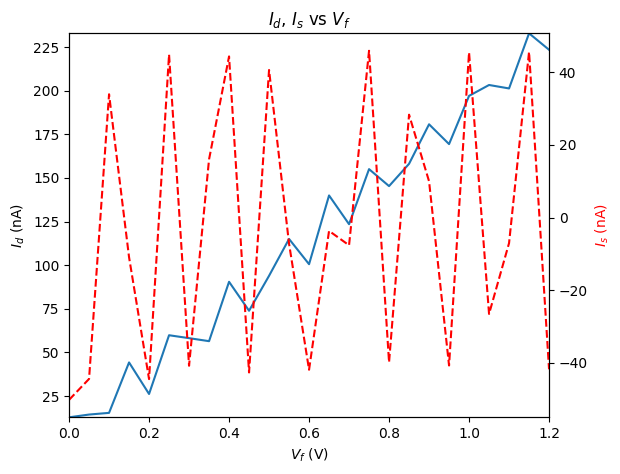

In [27]:
HP.SetDiode(0, 1.2 if ptype else -1.2, 0.05 if ptype else -0.05)
HP.SetIntTime("SHOR")
HP.SetHoldTime(0.01)

now=datetime.datetime.now().strftime("%y%m%d %H%M%S")

plotp=f"{path}{HP.term}-{now}.csv"

HP.SingleSave(plotp, timeout)
Plot(plotp, "Vf", ["Id", "Is"])

In [17]:
HP.SetIntTime("MED")
HP.ask(":PAGE:MEAS:MSET:ITIM?")

'MED'

In [18]:
if VGS['enable']:
    HP.SetVgS(VGS, ptype)
    
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set IdxVgs
Vg=(0, 1.5, 0.02), Vd=0.05, Ilim=0.0015


Starting IdxVgs. Duration: 11 s
0.559


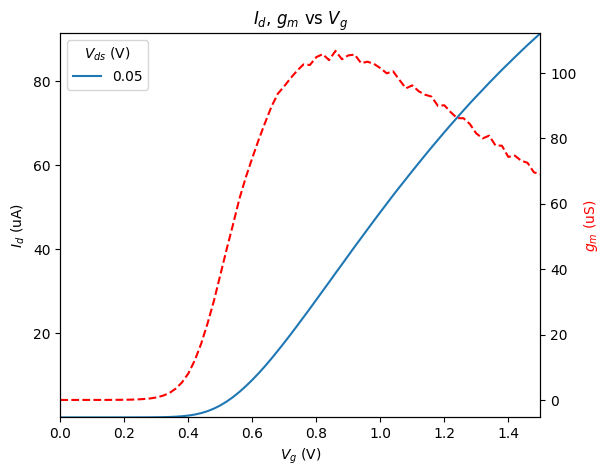

In [19]:
if VGS['enable']:
    HP.SingleSave(plotp, timeout)
    try:
        VTO=PlotVgs(plotp)
        print(VTO)
    except:
        Plot(plotp, 'Vg', 'Id')
        print("VTO fail")

In [20]:
if VGS_sat['enable']:
    HP.SetVgS(VGS_sat, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}IdVgsSat-{now}.csv"

Set IdxVgs
Vg=(0, 1.5, 0.02), Vd=1.5, Ilim=0.0015


Starting IdxVgs. Duration: 11 s
1.532


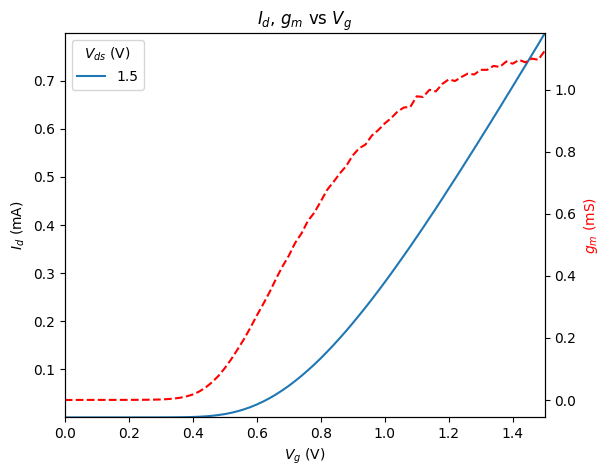

In [21]:
if VGS_sat['enable']:
    HP.SingleSave(plotp, timeout)
    try:
        VTO=PlotVgs(plotp)
        print(VTO)
    except:
        Plot(plotp, 'Vg', 'Id')
        print("VTO fail")

In [22]:
if VDS['enable']:
    HP.SetVdS(VDS, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set IdxVds
Vd=(0, 1.5, 0.02), Vg=(0.5, 1.5, 0.25), Ilim=0.0015


Starting IdxVds. Duration: 73 s30s | 


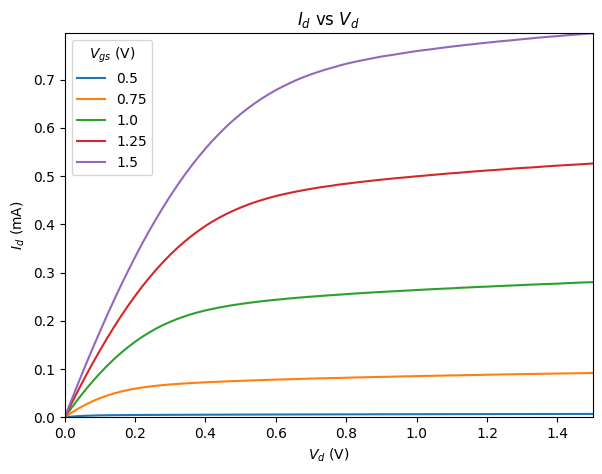

In [23]:
if VDS['enable']:
    HP.SingleSave(plotp, timeout*5)
    Plot(plotp, 'Vd', 'Id')

In [24]:
if False:
    HP.Set2P(-1e-4, 1e-4, 50, SMUN='SMU1', SMUP='SMU2', Comp=1)
    start=datetime.datetime.now().strftime("%y%m%d %H%M")
    print(Plot2P(HP.SingleSave(f'{path}/2P - {start}.csv', timeout=30)))
    
    HP.Set4P(-5e-3, 5e-3, 50, Im='SMU1', Ip='SMU2', Comp=1)
    start=datetime.datetime.now().strftime("%y%m%d %H%M")
    print(Plot2P(HP.SingleSave(f'{path}/4P - {start}.csv', timeout=30)))

In [ ]:
HP.SingleDiode(-1, 1, 0.05, 'SMU2', 'SMU1')
now=datetime.datetime.now().strftime("%y%m%d %H%M%S")

plotp=f"{path}{HP.term}-{now}.csv"

HP.SingleSave(plotp, timeout)

Plot(plotp, "Vf", "If")